# Benchmark Streaming XOR Experiments

In the following experiments, we test our two streaming tree implementations (stream decision tree and stream decision forest) on variations of the classic XOR classification task and benchmark against existing popular streaming tree algorithms. We utilize a customized fork of scikit-learn with an added `partial_fit` function. For additional implementation details and pseudocode see: [Streaming Decision Trees and Forests](https://arxiv.org/abs/2110.08483)

## Benchmark Classifiers 
We compare SDT and SDF to two popular streaming classifiers:
- [Hoeffding Tree Classifier](https://riverml.xyz/latest/api/tree/HoeffdingTreeClassifier/) 
- [Mondrian Forest Classifier](https://scikit-garden.github.io/api/#skgardenmondrianmondrianforestclassifier)




In [9]:
import sys

sys.path.append("../benchmarks/code/")
import xor_functions as fn

**Note:** This notebook uses functions stored within `benchmarks/code/xor_functions.py`

### Running the Experiments
**Note:** It is not necessary to run the experiments to visualize the results. Results are available in `benchmarks/results`.
However, if you would like to run the experiments you can use the following commands: 

**Run all classifier benchmarks for Experiment 1: XOR, R-XOR, XOR**
```
cd benchmarks/code
python r_xor.py -all
```
**or run specified classifier benchmarks for Experiment 1: XOR, R-XOR, XOR**
```
cd benchmarks/code
python r_xor.py -ht -sdf
```
**Classifiers:**

Hoeffding Tree: `-ht`, Mondrian Forest: `-mf`, Stream Decision Tree: `-sdt`, and Stream Decision Forest: `-sdf`

**For Experiment 2: XOR, XNOR, XOR replace `r_xor.py` with `xnor.py`**

## Experiment 1: Gaussian XOR and Gaussian R-XOR Simulated Data
In experiment 1, we use Gaussian XOR and Gaussian R-XOR simulated data. Gaussian R-XOR has the same distribution as Gaussian XOR, but with the class labels rotated 45 degrees. We introduce 750 samples of XOR data, followed by 750 samples of R-XOR data, and then an additional 750 samples of XOR data. Data are introduced in batches of 25 samples at a time. 

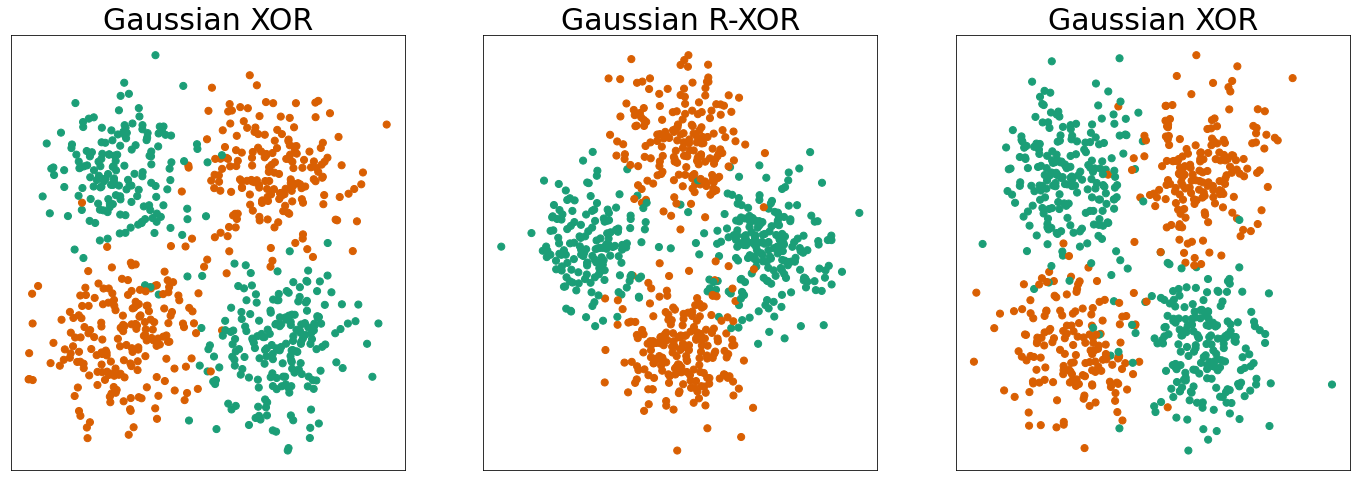

In [10]:
fn.plot_xor_rxor_xor(num_data_points=750)

### Loading the Results
We can visualize the results of experiment 1 by first loading the generalization errors from .txt files stored in `benchmarks/results`

In [11]:
directory = "../benchmarks/results/"
prefixes = ["ht/", "mf/", "sdt/", "sdf/"]
rxor_mean_errors = []
for prefix in prefixes:
    xor_error = fn.load_result(directory + prefix + "rxor_exp_xor_error.txt")
    r_xor_error = fn.load_result(directory + prefix + "rxor_exp_r_xor_error.txt")
    rxor_mean_errors.append(xor_error)
    rxor_mean_errors.append(r_xor_error)

### Visualizing the Results 
Now we can plot the results of the XOR, R-XOR, XOR experiment. The plot on the left shows generalization errors for XOR data and the plot on the right shows generalization errors for R-XOR data. The generalization errors are averaged over 50 repetitions of the experiment. 

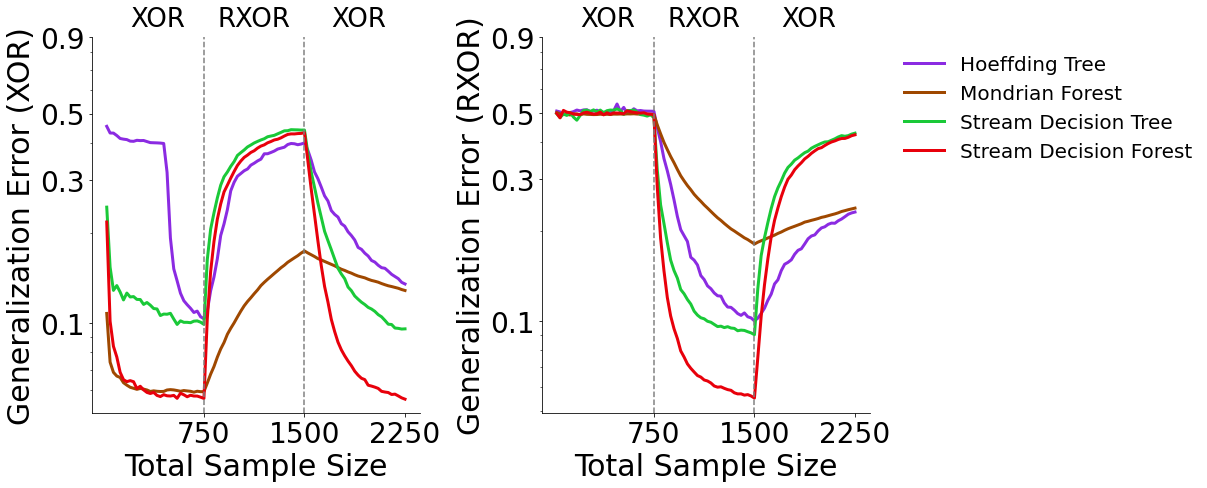

In [12]:
fn.r_xor_plot_error(rxor_mean_errors)

#### XOR Generalization Error (Left)
SDF and MF outperform SDT and HT on XOR data when trained only on XOR data. As RXOR data is introduced, MF outperforms the other classifiers. However, when additional XOR data is introduced SDT and SDF outperform HT and MF, with SDF performing best. 

#### R-XOR Generalization Error (Right)
All classifiers perform at chance error on R-XOR data when trained only on XOR data as expected. As R-XOR data are introduced, SDT and SDF outperform HT and MF. As additional RXOR data are introduced, SDT and SDF errors approach chance. HT and MF generalization error also increases.


## Experiment 2: Gaussian XOR and Gaussian XNOR Simulated Data
In experiment 2, we use Gaussian XOR and Gaussian XNOR simulated data. Gaussian XNOR has the same distribution as Gaussian XOR, but with the class labels rotated 90 degrees. Therefore, XNOR has the same optimal discriminant boundary as XOR. We first introduce 750 samples of XOR, followed by 750 samples of XNOR, followed by 750 additional samples of XOR. Data are introduced in batches of 25 samples at a time.

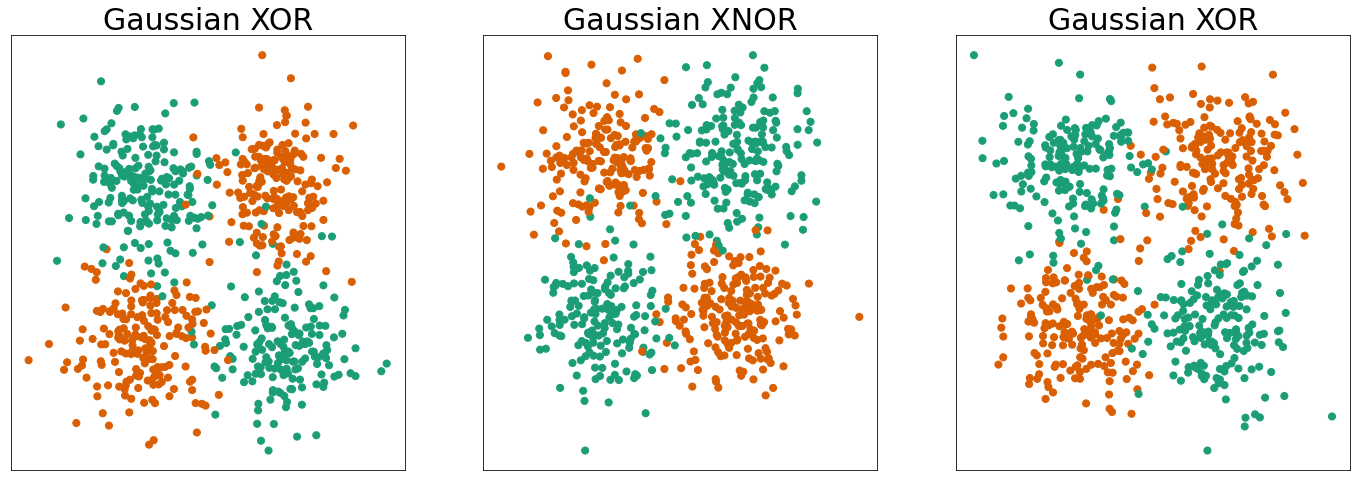

In [13]:

fn.plot_xor_xnor_xor(num_data_points = 750)

### Loading the Results 
We can visualize the results of experiment 2 by first loading the generalization errors from .txt files stored in `benchmarks/results`

In [14]:
directory = "../benchmarks/results/"
prefixes = ["ht/", "mf/", "sdt/", "sdf/"]
xnor_mean_errors = []
for prefix in prefixes:
    xor_error = fn.load_result(directory + prefix + "xnor_exp_xor_error.txt")
    xnor_error = fn.load_result(directory + prefix + "xnor_exp_xnor_error.txt")
    xnor_mean_errors.append(xor_error)
    xnor_mean_errors.append(xnor_error)

### Visualizing the Results
Now we can plot the results of the XOR, XNOR, XOR experiment. The plot on the left shows generalization errors for XOR data and the plot on the right shows generalization errors for XNOR data. The generalization errors are averaged over 50 repetitions of the experiment. 

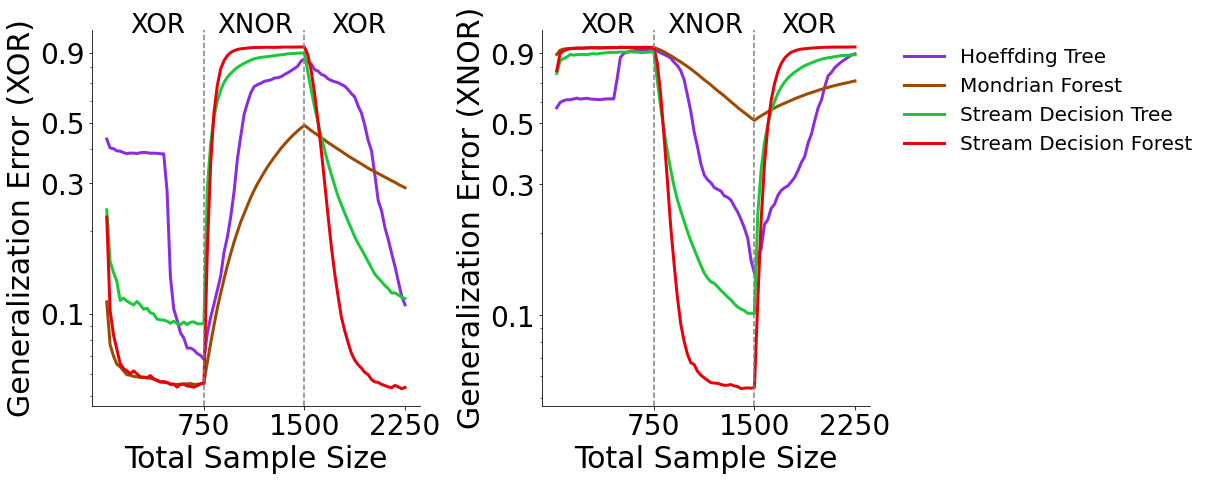

In [15]:
fn.xnor_plot_error(xnor_mean_errors)

#### XOR Generalization Error (Left)
Overall, SDF outperforms all other classifiers when tested on XOR data. When XNOR data are introduced, MF performs best (but proceeds to have the worst performance when additional XOR data are introduced). Poor performance is expected when XNOR data are introduced because XNOR has the same optimal discriminant boundary as XOR, but with opposite class labels. 


#### XNOR Generalization Error (Right)
Similarly, when tested on XNOR data, all four classifiers perform poorly when trained only on XOR data. As XNOR data are introduced, SDT and SDF quickly outperform HT and MF. As additional XOR data are introduced, all classifiers perform poorly as expected. 